---
Credentials:

In [1]:
user='admin'
password='password'
host='127.0.0.1'
port='3306'
db_name='database'

---
Imports

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---
Create sqlalchemy engine

In [3]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{db_name}")

---
# Задачи
* Из таблиц `employees` и `salaries` с помощью `INNER JOIN` получить
`emp_no`, `first_name`, `last_name`, `salary`, `from_date`, `to_date`. Использовать `AS`.

In [4]:
limit = 100
df = pd.read_sql_query(f"SELECT emp.emp_no, emp.first_name, emp.last_name, s.salary "
                       f"FROM employees.employees AS emp "
                       f"INNER JOIN  employees.salaries AS s "
                       f"ON emp.emp_no = s.emp_no "
                       f"LIMIT {limit}", engine)

df.head(limit)

,emp_no,first_name,last_name,salary
0,10001,Georgi,Facello,60117
1,10001,Georgi,Facello,62102
2,10001,Georgi,Facello,66074
3,10001,Georgi,Facello,66596
4,10001,Georgi,Facello,66961
...,...,...,...,...
95,10009,Sumant,Peac,74612
96,10009,Sumant,Peac,76518
97,10009,Sumant,Peac,78335
98,10009,Sumant,Peac,80944


Plot data

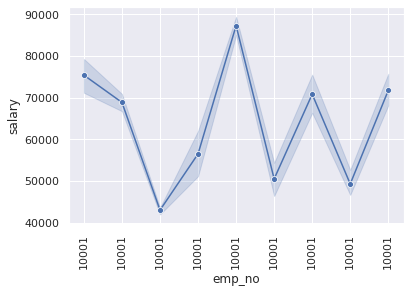

In [5]:
sns.set_theme(style="darkgrid")
my_plot = sns.lineplot(x="emp_no", y="salary", marker="o", data=df)
my_plot.set_xticklabels(labels=df["emp_no"], rotation=90)

plt.show()

* Список людей, которые переходили из одного департамента в другой (то есть количество департаментов на одного сотрудника > 1).
Вывести в результатах`emp_no`, `<количество департаментов, в котором побывал сотрудник>`.
Отсортировано по количеству департаментов на сотрудника.

In [6]:
df = pd.read_sql_query(f"SELECT * "
                       f"FROM ("
                       f"SELECT emp_no, COUNT(*) AS emp_moves "
                       f"FROM employees.dept_emp GROUP BY emp_no"
                       f") AS emp_num "
                       f"WHERE emp_num.emp_moves > 1 "
                       f"ORDER BY emp_num.emp_moves DESC "
                       f"LIMIT {limit}",
                       engine)

df.head(limit)

,emp_no,emp_moves
0,10010,2
1,10018,2
2,10029,2
3,10040,2
4,10050,2
...,...,...
95,10926,2
96,10937,2
97,10948,2
98,10956,2


Получить все данные о сотрудниках из департамента `word` (например: `Development`).

In [7]:
word = 'Development'

df = pd.read_sql_query(f"SELECT * FROM employees.employees as emp INNER JOIN "
                       f"employees.dept_emp as dep "
                       f"ON emp.emp_no = dep.emp_no "
                       f"WHERE dept_no = "
                       f"(SELECT dept_no "
                       f"FROM employees.departments "
                       f"WHERE dept_name = 'Development') "
                       f"LIMIT {limit}",
                       engine)

df.head(limit)

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,d005,1986-06-26,9999-01-01
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,10006,d005,1990-08-05,9999-01-01
2,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,10008,d005,1998-03-11,2000-07-31
3,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,10012,d005,1992-12-18,9999-01-01
4,10014,1956-02-12,Berni,Genin,M,1987-03-11,10014,d005,1993-12-29,9999-01-01
...,...,...,...,...,...,...,...,...,...,...
95,10342,1960-03-17,Stella,Hiroyama,F,1987-07-25,10342,d005,1987-07-25,9999-01-01
96,10345,1960-12-13,Arra,Ratnakar,M,1993-11-08,10345,d005,1993-11-08,9999-01-01
97,10352,1960-01-28,Erzsebet,Ohori,M,1996-01-21,10352,d005,1998-12-16,9999-01-01
98,10358,1953-04-08,Qunsheng,Tagansky,M,1991-02-19,10358,d005,1991-02-19,9999-01-01


Получить максимальную ЗП сотрудника (за все время) из департамента `word` (например: `Development`).